In [1]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

Using TensorFlow backend.


NameError: name 'model' is not defined

In [2]:
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')
model.save('mnist_mlp_model.h5')

OSError: Unable to open file (unable to open file: name = 'mnist_mlp_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

NameError: name 'model' is not defined

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

NameError: name 'model' is not defined

In [5]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import tensorflow
import keras

print('scipy ' + scipy.__version__)
print('numpy ' + numpy.__version__)
print('matplotlib ' + matplotlib.__version__)
print('pandas ' + pandas.__version__)
print('sklearn ' + sklearn.__version__)
print('h5py ' + h5py.__version__)

print('tensorflow ' + tensorflow.__version__)
print('keras ' + keras.__version__)

scipy 1.4.1
numpy 1.18.1
matplotlib 3.1.1
pandas 0.25.3
sklearn 0.22
h5py 2.10.0
tensorflow 2.0.0
keras 2.3.1


In [6]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.6600 - accuracy: 0.8307
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3437 - accuracy: 0.9045
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.2957 - accuracy: 0.9177
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2670 - accuracy: 0.9260
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
loss_and_metrics : [0.22946262099444867, 0.9344000220298767]


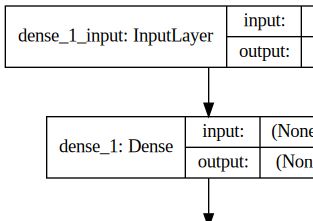

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

In [9]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

NameError: name 'X_val' is not defined

NameError: name 'hist' is not defined

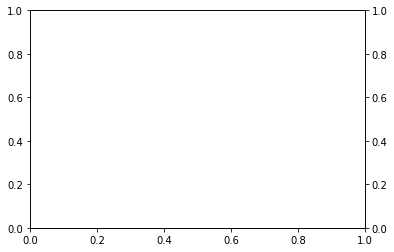

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 307us/step - loss: 2.2820 - accuracy: 0.1429 - val_loss: 2.2225 - val_accuracy: 0.2633
Epoch 2/1000
700/700 [==============================] - 0s 99us/step - loss: 2.1781 - accuracy: 0.2043 - val_loss: 2.1325 - val_accuracy: 0.3233
Epoch 3/1000
700/700 [==============================] - 0s 106us/step - loss: 2.1032 - accuracy: 0.3014 - val_loss: 2.0701 - val_accuracy: 0.3400
Epoch 4/1000
700/700 [==============================] - 0s 94us/step - loss: 2.0444 - accuracy: 0.3257 - val_loss: 2.0204 - val_accuracy: 0.3200
Epoch 5/1000
700/700 [==============================] - 0s 94us/step - loss: 1.9932 - accuracy: 0.3357 - val_loss: 1.9762 - val_accuracy: 0.3133
Epoch 6/1000
700/700 [==============================] - 0s 94us/step - loss: 1.9452 - accuracy: 0.3557 - val_loss: 1.9347 - val_accuracy: 0.3133
Epoch 7/1000
700/700 [==============================] - 0s 93us/step - loss: 1.900

In [3]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import tensorflow
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 100)
val_rand_idxs = np.random.choice(10000, 30)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
tf.data.Dataset.from_tensor_slices(filenames)

NameError: name 'tf' is not defined

In [2]:
import tensorflow as tf

In [3]:
tf.data.Dataset.from_tensor_slices(filenames)

NameError: name 'filenames' is not defined

In [14]:
# filenames = "./mydataset"
# tf.data.Dataset.from_tensor_slices(filenames)
import os
import pandas as pd
PATH = os.getcwd() + "/mvdataset/IMDB_movie_details.csv"

data = pd.read_csv(PATH)


In [26]:
data

,movie_id,plot_summary,duration,genre/0,genre/1,rating,release_date,plot_synopsis,genre/2
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,Action,Thriller,6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",NaN
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,Comedy,NaN,6.6,2013-11-01,Four boys around the age of 10 are friends in ...,NaN
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,Comedy,Romance,6.7,2002-04-11,NaN,NaN
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,Adventure,Drama,8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,Western
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,Comedy,Drama,7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,Romance
...,...,...,...,...,...,...,...,...,...
1567,tt0289879,Evan Treborn grows up in a small town with his...,1h 53min,Sci-Fi,Thriller,7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher...",NaN
1568,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,Drama,NaN,7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ...",NaN
1569,tt5013056,Evacuation of Allied soldiers from the British...,1h 46min,Action,Drama,8.1,2017-07-21,The film alternates between three different pe...,History
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",1h 33min,Comedy,Drama,5.3,1992-02-21,NaN,NaN


In [27]:
data.plot_synopsis[0]

'Jack Ryan (Ford) is on a "working vacation" in London with his family. He has retired from the CIA and is a Professor at the US Naval Academy. He is seen delivering a lecture at the Royal Naval Academy in London.Meanwhile, Ryan\'s wife Cathy and daughter Sally are sightseeing near Buckingham Palace. Sally and Cathy come upon a British Royal Guard, and Sally tries to get the guard to react by doing an improvised tap dance in front of him. She\'s impressed when the guard, trained to ignore distraction, doesn\'t react at all, and they leave.As Sally and Cathy walk away from the guard, en route to rendezvous with Ryan, they walk by a stolen cab, in which sit three Ulster Liberation Army terrorists: Kevin O\'Donnell, the driver, as well as Sean Miller (Sean Bean) and his younger brother Patrick. The three are loading bullets into their guns as they prepare to carry out a scheduled ambush on Lord William Holmes, British Secretary of State for Northern Ireland and a distant member of the Bri

In [37]:
data.movie_id.to_numpy()

array(['tt0105112', 'tt1204975', 'tt0243655', ..., 'tt5013056',
       'tt0104014/', 'tt0114142/'], dtype=object)

In [29]:
dataset

<TextLineDatasetV2 shapes: (), types: tf.string>

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
PATH = os.getcwd() + "/mvdataset/IMDB_reviews.json/IMDB_reviews.json"
#print(os.listdir(PATH))
df_reviews = pd.read_json(PATH, lines=True).drop_duplicates("review_text").sample(frac=1)

df_reviews.review_date = pd.to_datetime(df_reviews.review_date,infer_datetime_format=True)
df_reviews.user_id = df_reviews.user_id.astype('category').cat.codes # use int instead of string to store users
print(df_reviews.shape)
df_reviews.tail()

(573385, 7)


,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
563244,2000-06-13,tt0177789,23013,False,This is how a spoof should be handled! Galaxy ...,10,This movie should be enshrined...
497798,2010-10-23,tt0104990,68645,False,"In 1899 New York City, paper boys sing, dance,...",7,"For Kenny Ortega, It's First Strike and You're..."
261965,2016-06-27,tt2404233,177845,False,"Okay, this might not be the best movie ever, o...",10,Just for fun
482753,2014-05-26,tt0099810,193157,False,I can't remember when I have given such a good...,7,"Unlikely, Exciting Movie That Fails to Make a ..."
484459,2015-08-22,tt0099329,137471,False,It's the class of '54 in a Baltimore high scho...,6,ridiculous camp but not necessarily funny


In [9]:
df_reviews.tail()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
563244,2000-06-13,tt0177789,23013,False,This is how a spoof should be handled! Galaxy ...,10,This movie should be enshrined...
497798,2010-10-23,tt0104990,68645,False,"In 1899 New York City, paper boys sing, dance,...",7,"For Kenny Ortega, It's First Strike and You're..."
261965,2016-06-27,tt2404233,177845,False,"Okay, this might not be the best movie ever, o...",10,Just for fun
482753,2014-05-26,tt0099810,193157,False,I can't remember when I have given such a good...,7,"Unlikely, Exciting Movie That Fails to Make a ..."
484459,2015-08-22,tt0099329,137471,False,It's the class of '54 in a Baltimore high scho...,6,ridiculous camp but not necessarily funny


In [23]:
from keras.preprocessing.text import Tokenizer
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

max_words = 3  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
texts = " He is seen delivering a lecture at the Royal Naval Academy in London.Meanwhile, Ryan\'s wife Cathy and daughter Sally are sightseeing near Buckingham Palace. Sally and Cathy come upon a British Royal Guard, and Sally tries to get the guard to react by doing an improvised tap dance in front of him. She\'s impressed when the guard, trained to ignore distraction, doesn\'t react at all, and they leave.As Sally and Cathy walk away from the guard, en route to rendezvous with Ryan, they walk by a stolen cab, in which sit three Ulster Liberation Army terrorists: Kevin O\'Donnell"
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
print(remove_values_from_list([remove_values_from_list(a,None) for a in sequences],[]))
word_index = tokenizer.word_index
print(word_index)
print(sequences)

[[2], [2], [2], [2], [2], [1], [2], [2], [1], [2], [1], [1], [1], [1], [1], [2], [2], [1], [2], [1], [2], [1], [1], [1], [2], [1], [1], [2], [2], [2], [2], [1], [1], [1], [1], [2], [1], [1], [1], [2], [1], [1], [1], [1], [1], [2], [2], [2], [1], [2], [1], [1], [2], [1], [1], [2], [2], [2], [2], [2], [2], [1], [1], [2], [2], [1], [2], [2], [1], [1], [1], [1], [2], [2], [1], [2], [1], [1], [1], [1], [1], [1], [1], [2], [1], [2], [2], [2], [2], [1], [2], [1], [1], [2], [1], [2], [2], [2], [2], [1], [1], [2], [2], [2]]
{'a': 1, 'e': 2, 't': 3, 'n': 4, 'r': 5, 'i': 6, 'l': 7, 's': 8, 'o': 9, 'h': 10, 'd': 11, 'y': 12, 'c': 13, 'g': 14, 'u': 15, 'm': 16, 'w': 17, 'v': 18, 'b': 19, 'p': 20, "'": 21, 'f': 22, 'k': 23, 'z': 24}
[[], [], [2], [], [], [], [], [], [2], [2], [], [], [], [2], [], [], [], [2], [], [], [], [], [], [1], [], [], [2], [], [], [], [], [2], [], [1], [], [], [], [], [2], [], [], [], [], [1], [], [], [], [1], [], [1], [], [], [1], [], [1], [], [2], [], [], [], [], [], [], []

In [19]:
len([])

0